# Features Subset Selction Methods

In [13]:
library('ISLR')
library('leaps')

In [3]:
?Hitters

In [5]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [6]:
dim(Hitters)

[1] 322  20

In [12]:
sum(is.na(Hitters$Salary))  # Find number of missing salary values
Hitters = na.omit(Hitters)
dim(Hitters)

[1] 0

[1] 263  20

# Best Subset Selection

In [14]:
regfit.full = regsubsets(Salary~., data=Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

#### By default regsubsets() reporty upto best eight-variable model. nvmax value can be used to return as many variables as desired.

In [16]:
regfit.full = regsubsets(Salary~., data=Hitters, nvmax=19)
reg.summary = summary(regfit.full)

In [17]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

## Test error Estimates

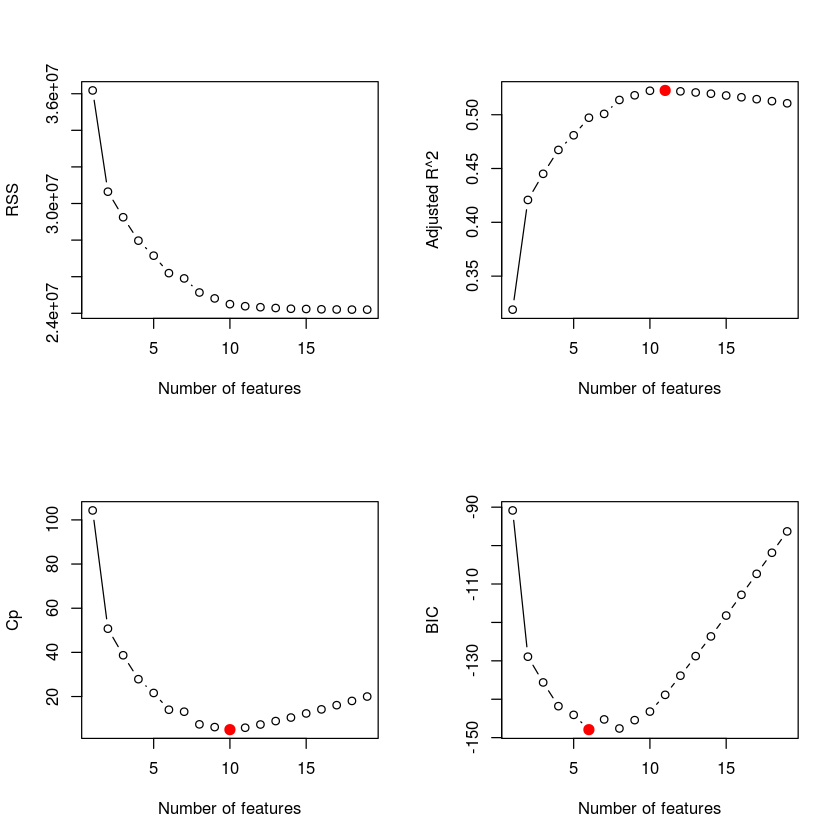

In [26]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="Number of features", ylab="RSS", type="b")

plot(reg.summary$adjr2, xlab="Number of features", ylab="Adjusted R^2", type="b")
p = which.max(reg.summary$adjr2)
points(p, reg.summary$adjr2[p], col="red", cex=2, pch=20)

plot(reg.summary$cp, xlab="Number of features", ylab="Cp", type="b")
p = which.min(reg.summary$cp)
points(p, reg.summary$cp[p], col="red", cex=2, pch=20)

plot(reg.summary$bic, xlab="Number of features", ylab="BIC", type="b")
p = which.min(reg.summary$bic)
points(p, reg.summary$bic[p], col="red", cex=2, pch=20)

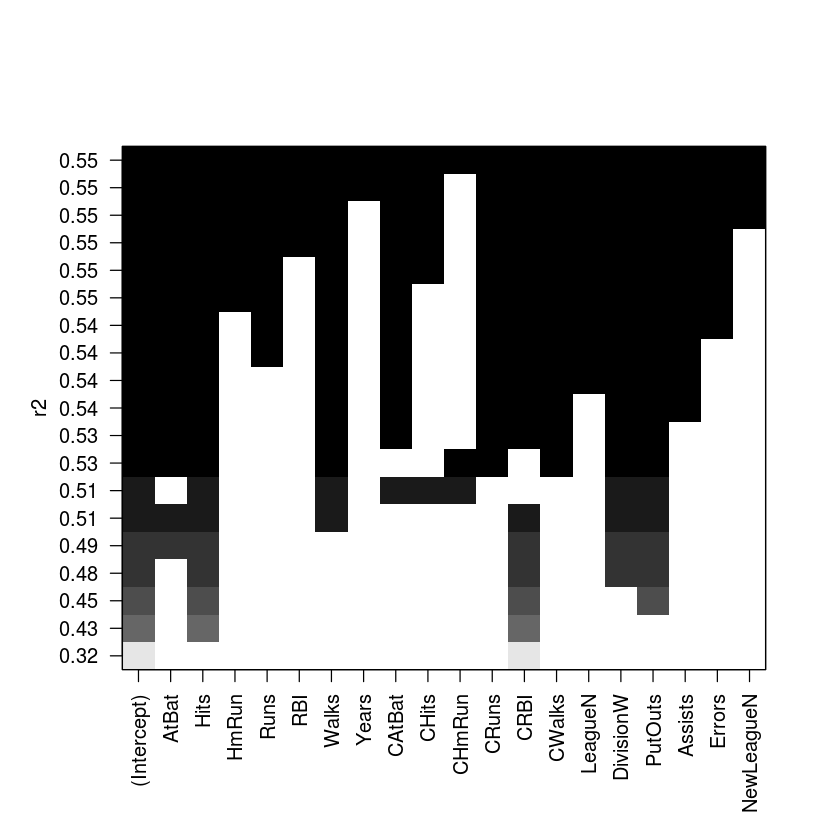

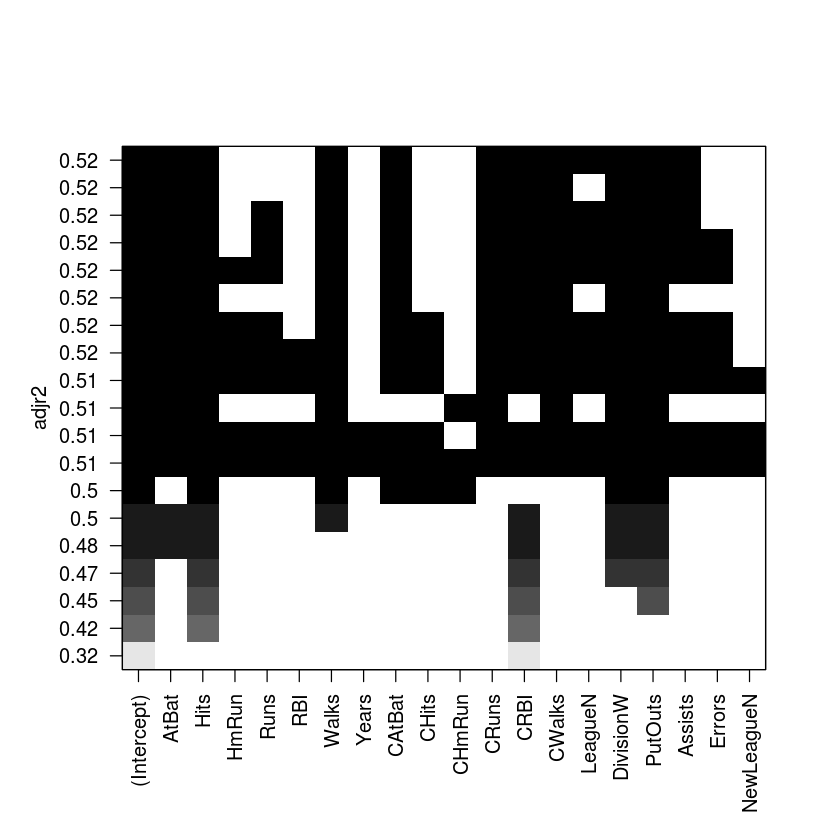

In [34]:
# Display selected variables for the best model with a given number of predictors.
plot(regfit.full ,scale="r2")
plot(regfit.full ,scale="adjr2")

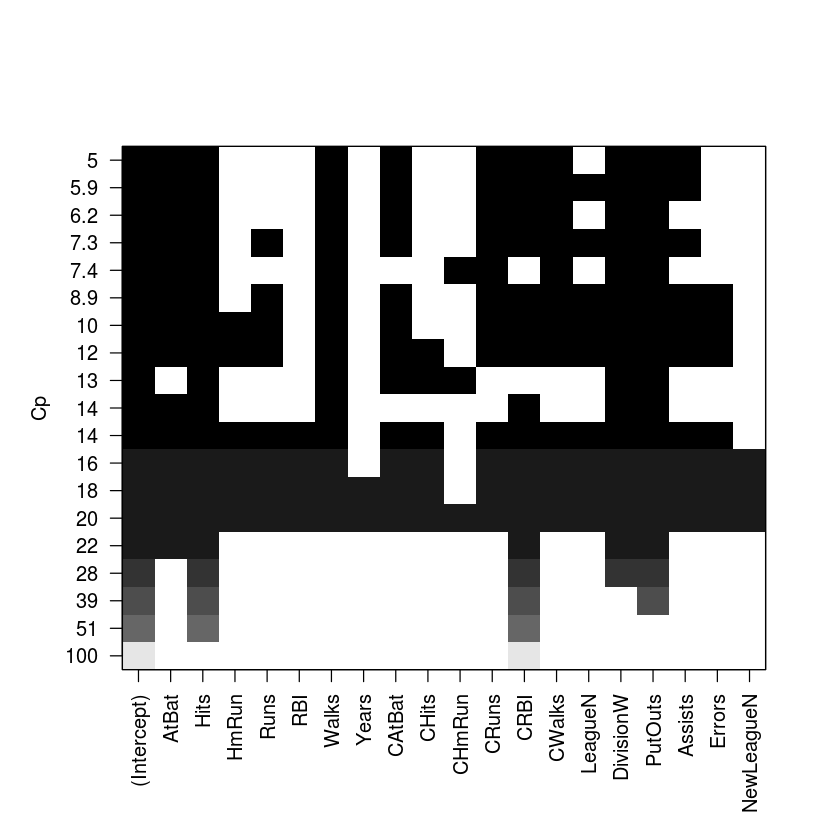

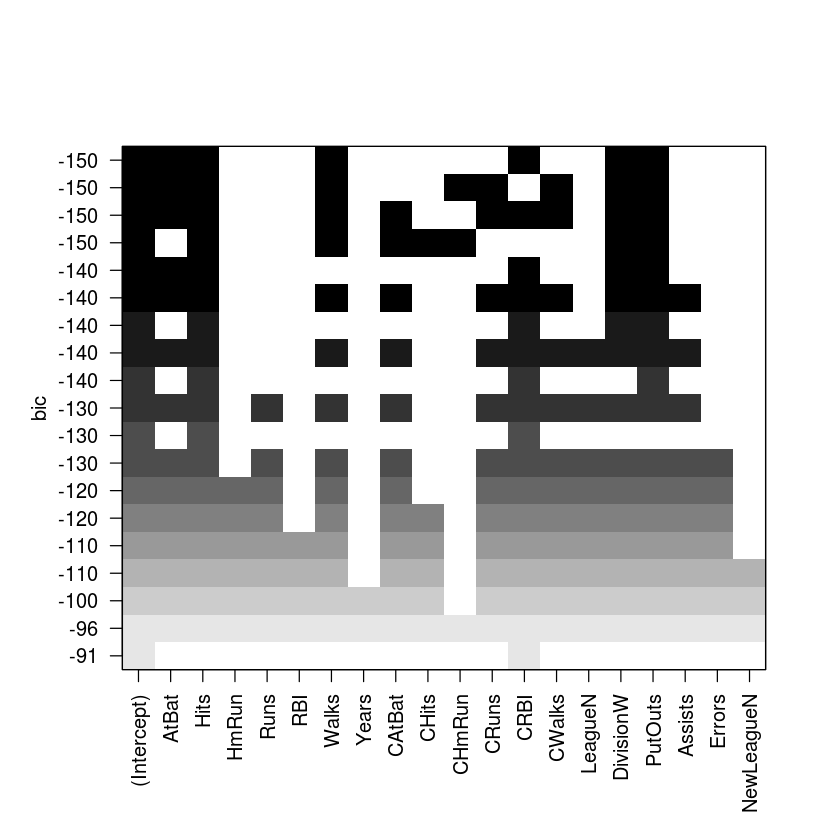

In [35]:
plot(regfit.full ,scale="Cp")
plot(regfit.full ,scale="bic")

In [32]:
# Coefficents of best model
coef(regfit.full,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# Forward Stepwise Subset Selection

In [39]:
regfit.fwd = regsubsets(Salary~., data=Hitters, nvmax=19, method="forward")
reg.summary=summary(regfit.fwd)

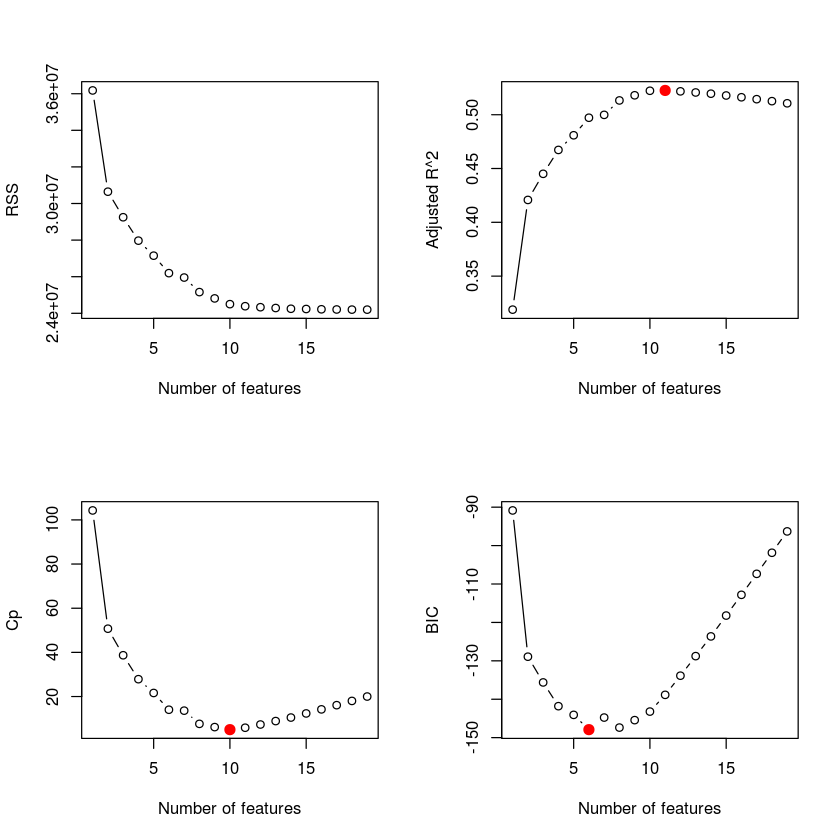

In [40]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="Number of features", ylab="RSS", type="b")

plot(reg.summary$adjr2, xlab="Number of features", ylab="Adjusted R^2", type="b")
p = which.max(reg.summary$adjr2)
points(p, reg.summary$adjr2[p], col="red", cex=2, pch=20)

plot(reg.summary$cp, xlab="Number of features", ylab="Cp", type="b")
p = which.min(reg.summary$cp)
points(p, reg.summary$cp[p], col="red", cex=2, pch=20)

plot(reg.summary$bic, xlab="Number of features", ylab="BIC", type="b")
p = which.min(reg.summary$bic)
points(p, reg.summary$bic[p], col="red", cex=2, pch=20)

In [41]:
coef(regfit.fwd,6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

# Backward Stepwise Subset Selection

In [43]:
regfit.bwd = regsubsets(Salary~., data=Hitters, method="backward")
regfit.summary = summary(regfit.bwd)

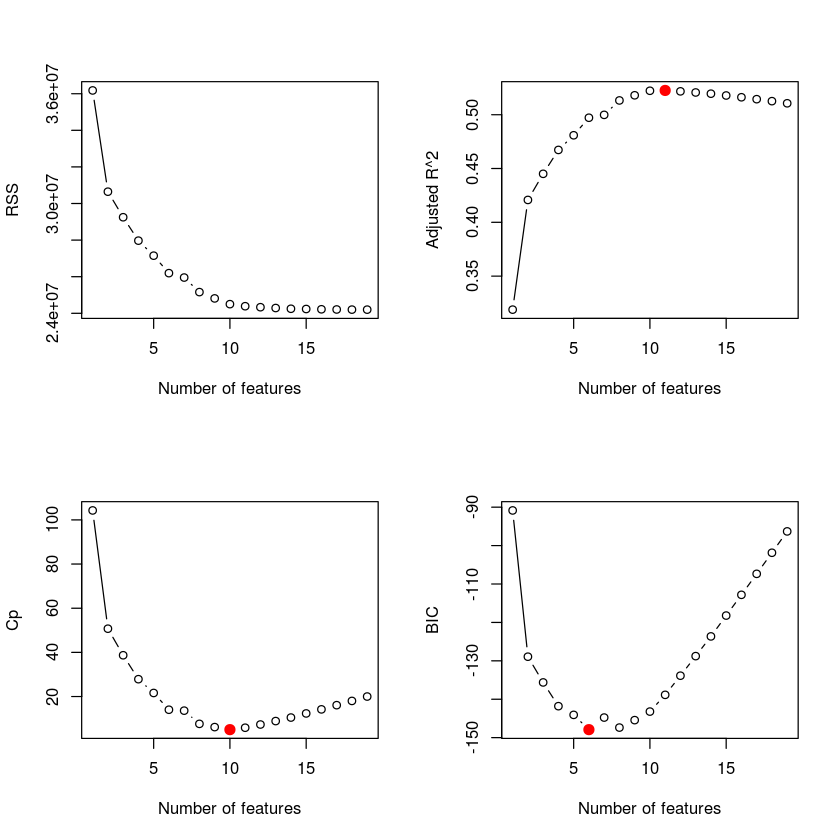

In [44]:
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab="Number of features", ylab="RSS", type="b")

plot(reg.summary$adjr2, xlab="Number of features", ylab="Adjusted R^2", type="b")
p = which.max(reg.summary$adjr2)
points(p, reg.summary$adjr2[p], col="red", cex=2, pch=20)

plot(reg.summary$cp, xlab="Number of features", ylab="Cp", type="b")
p = which.min(reg.summary$cp)
points(p, reg.summary$cp[p], col="red", cex=2, pch=20)

plot(reg.summary$bic, xlab="Number of features", ylab="BIC", type="b")
p = which.min(reg.summary$bic)
points(p, reg.summary$bic[p], col="red", cex=2, pch=20)

In [45]:
coef(regfit.bwd,6)

(Intercept)        AtBat         Hits        Walks        CRuns    DivisionW 
  78.2664070   -1.8158931    7.3597644    3.5123248    0.6187876 -113.7958600 
     PutOuts 
   0.2995788

# Choosing among Models using Validation Set

In [56]:
set.seed(1)
train = sample(1:nrow(Hitters),nrow(Hitters)/2)

In [57]:
regfit.best = regsubsets(Salary~., data=Hitters[train,], nvmax=19)


In [61]:
test.mat = model.matrix(Salary~., data=Hitters[-train,])
test.mat[1:10,]

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Argenis Salazar,1,298,73,0,24,24,7,3,509,108,0,41,37,12,0,1,121,283,9,0
-Andres Thomas,1,323,81,6,26,32,8,2,341,86,6,32,34,8,1,1,143,290,19,1
-Andre Thornton,1,401,92,17,49,66,65,13,5206,1332,253,784,890,866,0,0,0,0,0,0
-Alan Trammell,1,574,159,21,107,75,59,10,4631,1300,90,702,504,488,0,0,238,445,22,0
-Andy VanSlyke,1,418,113,13,48,61,47,4,1512,392,41,205,204,203,1,0,211,11,7,1
-Alan Wiggins,1,239,60,0,30,11,22,6,1941,510,4,309,103,207,0,0,121,151,6,0
-Bill Almon,1,196,43,7,29,27,30,13,3231,825,36,376,290,238,1,0,80,45,8,1


In [62]:
val.errors = rep(NA,19)
for(i in 1:19){
    coefi = coef(regfit.best,i)
    pred = test.mat[,names(coefi)]%*%coefi
    val.errors[i] = mean((Hitters$Salary[-train]-pred)^2)
}

In [66]:
val.errors

[1] 166665.85 112918.70 107792.51 104188.68 103438.23  96047.83  99792.77
 [8]  92724.07  95138.68  95654.72  96665.90  99094.17 114858.25 113671.72
[15] 115618.87 115301.10 115408.23 114785.33 114780.61

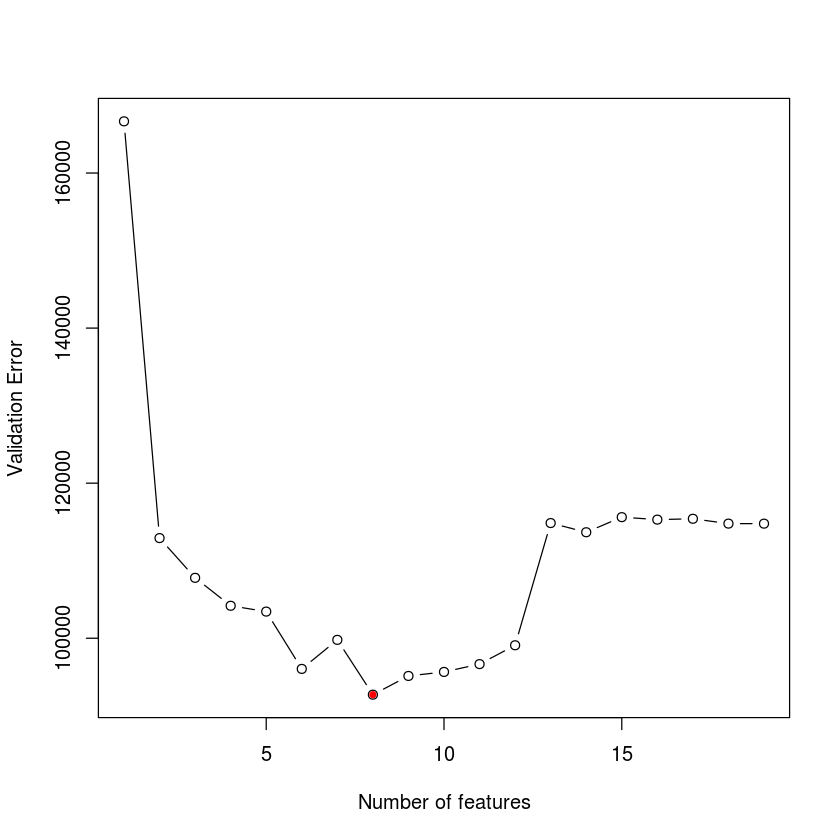

In [71]:
plot(val.errors, xlab="Number of features", ylab = "Validation Error", type="b")
p = which.min(val.errors)
points(p, val.errors[p],col="red", pch=20)

In [72]:
coef(regfit.best,p)

(Intercept)        AtBat         Hits        Walks        Years        CRuns 
 340.6076762   -1.9760551    5.0399253    7.3532824  -31.9020195    1.6214814 
      CWalks    DivisionW      PutOuts 
  -0.8590273 -136.1231449    0.3685941

### Note : Finally we perform best subset selection on full data set and select the best 8 variables. Best Subset selection based upon the full data set may be different than training data set.

In [73]:
regfit.best = regsubsets(Salary~., data=Hitters)
coef(regfit.best,8)

(Intercept)        AtBat         Hits        Walks       CHmRun        CRuns 
 130.9691577   -2.1731903    7.3582935    6.0037597    1.2339718    0.9651349 
      CWalks    DivisionW      PutOuts 
  -0.8323788 -117.9657795    0.2908431

### As you can in this example best subset variables of full data set and training data set is different.

# Chossing Among Models using Cross-Validation Set

In [91]:
k=10
set.seed(1)
folds = sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors = matrix(NA,k,19, dimnames=list(NULL,paste(1:19)))

In [98]:
predict.regsubsets = function(object,newdata,id){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form,newdata)
    coefi = coef(object,id=id)
    xvars = names(coefi)
    mat[,xvars]%*%coefi
}

In [100]:
for(j in i:k){
    best.fit = regsubsets(Salary~., data=Hitters[folds!=j,], nvmax=19)
    
    for(i in 1:19){
        pred = predict(best.fit,Hitters[folds==j,], id=i)
        cv.errors[j,i] = mean((Hitters$Salary[folds==j]-pred)^2)
    }
}

### This has given us a 10×19 matrix, of which the (i,j)th element corresponds to the test MSE for the ith cross-validation fold for the best j-variable model.

In [104]:
mean.cv.errors = apply(cv.errors,2,mean)

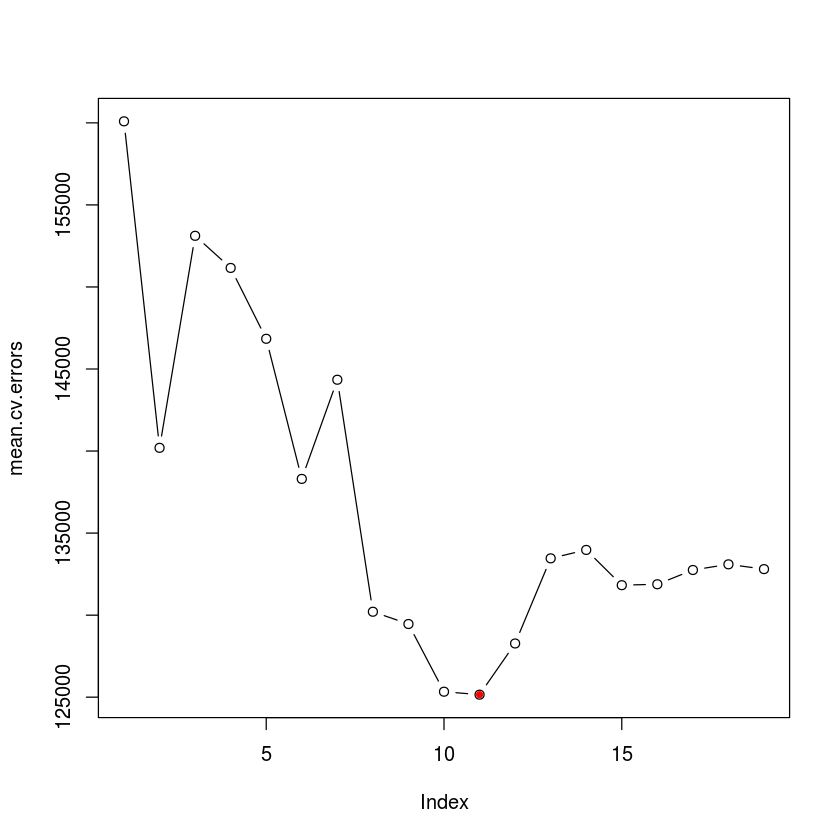

In [103]:
plot(mean.cv.errors, type="b")
p = which.min(mean.cv.errors)
points(p,mean.cv.errors[p], col="red", pch=20)

### Cross- validation selects a 11 variable model, now we perform best subset selection on full data set.

In [106]:
regfit.best = regsubsets(Salary~., data=Hitters, nvmax=19)
coef(regfit.best,11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277